In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from google.colab import drive

In [20]:
drive.mount('/content/drive')

modeling_df = pd.read_csv('/content/drive/MyDrive/DS Project Course/Project2/combined_2010.csv')
### COLUMNSS ###
# Year
# percent_change_cpi
# inflation_rate
# quantity_realestate_loans_billions
# realestate_price_change
# mortage_fixed_rate

modeling_df = modeling_df[modeling_df['Year'] <= 2024]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


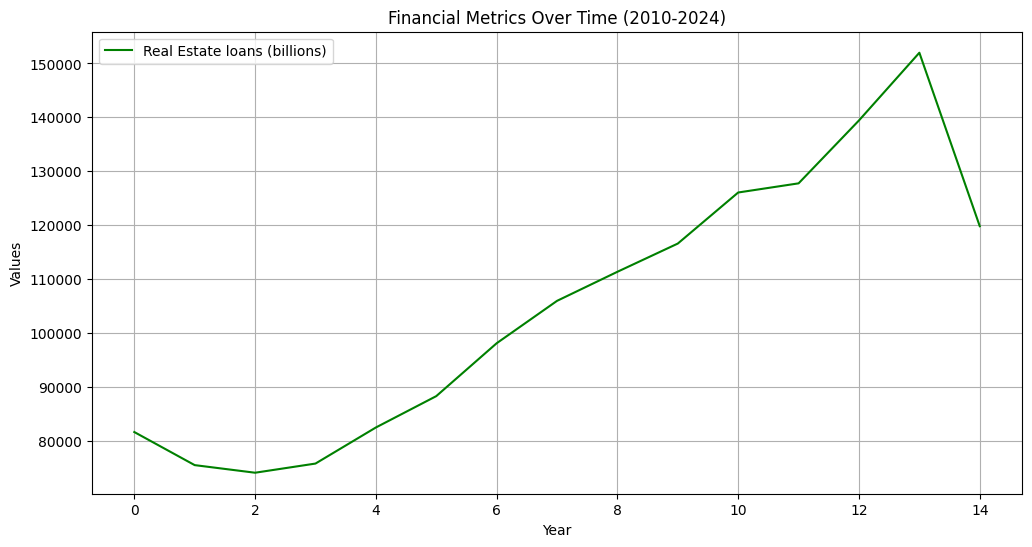

In [21]:
plt.figure(figsize=(12, 6))

plt.plot(modeling_df.index, modeling_df['quantity_realestate_loans_billions'], label='Real Estate loans (billions)', color='green')





plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Financial Metrics Over Time (2010-2024)')
plt.legend()
plt.grid()
plt.show()


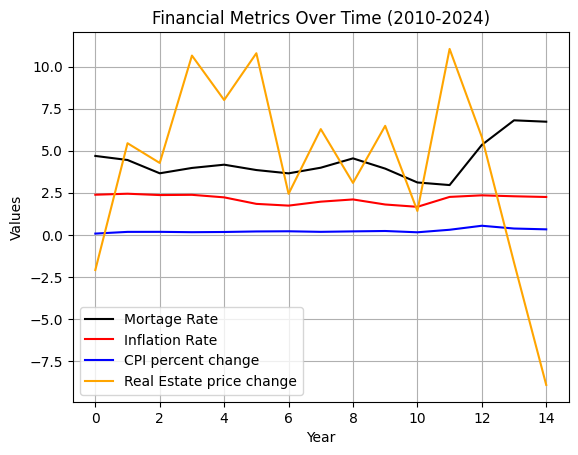

In [22]:
plt.plot(modeling_df.index, modeling_df['mortgage_fixed_rate'], label='Mortage Rate', color='black')
plt.plot(modeling_df.index, modeling_df['inflation_rate'], label='Inflation Rate', color='red')
plt.plot(modeling_df.index, modeling_df['percent_change_cpi'], label='CPI percent change', color='blue')
plt.plot(modeling_df.index, modeling_df['realestate_price_change'], label='Real Estate price change', color='orange')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Financial Metrics Over Time (2010-2024)')
plt.legend()
plt.grid()
plt.show()

In [24]:
### NOT SURE IF THIS WORKS OR IS CORRECT, just trying to point in the riht direction ###
### Some modeling to draw some conclusion ###

import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Check stationarity for each variable
for col in modeling_df.columns:
    result = adfuller(modeling_df[col])
    print(f'{col}: ADF Statistic: {result[0]}, p-value: {result[1]}')


# Fit VAR model
model = VAR(modeling_df[['percent_change_cpi', 'quantity_realestate_loans_billions', 'mortgage_fixed_rate', 'inflation_rate', 'realestate_price_change']])
model_fit = model.fit(maxlags=5)

# Get the last observed values for forecasting
last_observed_values = modeling_df[['percent_change_cpi', 'quantity_realestate_loans_billions',
                                     'mortgage_fixed_rate', 'inflation_rate',
                                     'realestate_price_change']].values[-model_fit.k_ar:]


# Forecast for 10 years
forecast = model_fit.forecast(last_observed_values, steps=10)

# Convert forecast to DataFrame for easier handling
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024', periods=10, freq='Y'), columns=model_fit.names)



Unnamed: 0: ADF Statistic: 0.27237960180970694, p-value: 0.9760411807826693
Year: ADF Statistic: -0.002145508764912539, p-value: 0.958354293925111
percent_change_cpi: ADF Statistic: 0.31202202870252455, p-value: 0.9778893763397393
inflation_rate: ADF Statistic: -1.8645804460938573, p-value: 0.34890255780307156
quantity_realestate_loans_billions: ADF Statistic: -0.5612957068692673, p-value: 0.879490005032989
realestate_price_change: ADF Statistic: 1.6284197456966436, p-value: 0.997940381920305
mortgage_fixed_rate: ADF Statistic: -1.1781444379440038, p-value: 0.6829260635541571


<ipython-input-24-aaa004785e4a>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024', periods=10, freq='Y'), columns=model_fit.names)
